In [40]:
from model_lomba import *
import matplotlib.pyplot as plt

map_width = 100
map_height = 100
moore = False
model = switching_model(num_of_motorist=20,num_of_stations=10,inv_size=20,cp_size= 2,width=map_width,height=map_height,moore=moore)

#Dalam menit
num_of_step = 1*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

(48, 7)
(43, 36)
(47, 1)
(43, 36)
(43, 36)
(12, 28)
(29, 23)
(12, 28)
(29, 23)
(43, 36)
(12, 28)
(29, 23)
(12, 28)
(12, 28)
(43, 36)
Motor dengan id: 58 menukar baterai 8 dengan 22
Motor dengan id: 64 menukar baterai 14 dengan 15
Motor dengan id: 53 menukar baterai 3 dengan 43
Motor dengan id: 55 menukar baterai 5 dengan 29
Motor dengan id: 54 menukar baterai 4 dengan 44
Motor dengan id: 57 menukar baterai 7 dengan 30
Motor dengan id: 60 menukar baterai 10 dengan 45
Motor dengan id: 63 menukar baterai 13 dengan 31
Motor dengan id: 56 menukar baterai 6 dengan 32
Motor dengan id: 61 menukar baterai 11 dengan 23
Motor dengan id: 59 menukar baterai 9 dengan 36
Motor dengan id: 52 menukar baterai 2 dengan 46
Motor dengan id: 50 menukar baterai 0 dengan 33
Motor dengan id: 62 menukar baterai 12 dengan 47
(12, 28)
(12, 28)
(12, 28)
(47, 1)
(12, 28)
(29, 23)
Di sini problemnya
(29, 23)
(12, 28)
(43, 36)
(43, 36)
(48, 7)
Di sini problemnya
(29, 23)
(43, 36)
(12, 28)
(29, 23)
Di sini problemnya


In [41]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position  Charge Alive  Full_battery  Empty_battery  \
Step AgentID                                                       
0    0           None  2600.0  None             0              0   
     1           None  2600.0  None             0              0   
     2           None  2600.0  None             0              0   
     3           None  2600.0  None             0              0   
     4           None  2600.0  None             0              0   

              Charging_port  
Step AgentID                 
0    0                    0  
     1                    0  
     2                    0  
     3                    0  
     4                    0

In [42]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
Name: Alive, dtype: object

In [43]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
65     (48, 7)
66    (29, 23)
67    (43, 36)
68     (47, 1)
69    (12, 28)
Name: Position, dtype: object


In [44]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
65    0
66    0
67    0
68    3
69    0
Name: Full_battery, dtype: int64


In [45]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
65    5
66    5
67    5
68    2
69    5
Name: Empty_battery, dtype: int64


In [46]:
agent_char = agent_data.xs(step_station,level = "Step")["Charging_port"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_char = agent_char[station_id]
print(station_char)

AgentID
65    2
66    2
67    2
68    2
69    2
Name: Charging_port, dtype: int64


In [47]:
#Ambil data motorist
driver_num = 0
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
1435    (12, 25)
1436    (12, 25)
1437    (12, 25)
1438    (12, 25)
1439    (12, 25)
Name: Position, dtype: object

Text(0, 0.5, 'y')

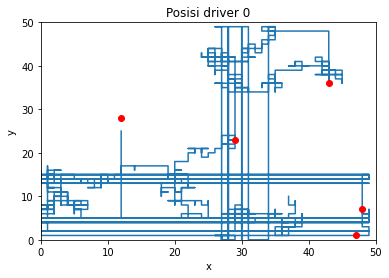

In [48]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.xlabel('x')
plt.ylabel('y')

<AxesSubplot:xlabel='Step'>

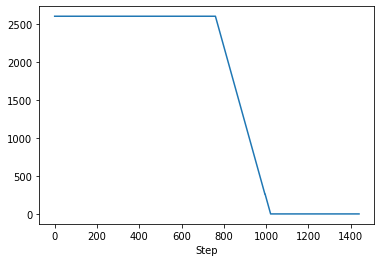

In [49]:
#Cek baterai
battery_id = 18
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()



In [50]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
1435,0
1436,0
1437,0
1438,0
1439,0


<AxesSubplot:>

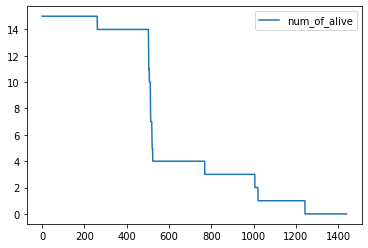

In [51]:
model_data.plot()

In [52]:
a = [1,2,3]
b = a
b.remove(3)
print(a)

[1, 2]
